# 🎒 Backpack Prediction Challenge

**FEUP 2024/2025 - L.EIC029 IART**

- Bruno Oliveira - 202208700  
- Henrique Fernandes - 202204988  
- Rodrigo Coelho - 202205188  

> Based on Kaggle Playground Season 5, Episode 2  
> April 2025

---

## 📖 Introduction

This project is related to the application of Supervised Learning techniques to real world problems. Specifically, we will develop and evaluate machine learning models that accurately predict the price of student backpacks (target variable), based on a variety of input attributes.

For this we will use a labeled dataset from Kaggle which contains different bag characteristics and we want to understand how they influence the price.

[Link to Backpack Prediction Challenge](https://www.kaggle.com/competitions/playground-series-s5e2/data)

We will follow the machine learning pipeline: data preprocessing, problem definition and target identification, model selection and parameter tuning, model training and testing, and result evaluation and comparison.  

---

## ⚙️ Project setup

### 📦 Virtual Environment

In order to setup the project, use the following commands to setup a virtual environment and install the needed dependencies:

In [5]:
!python3 -m venv .venv
!source .venv/bin/activate
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Once the dependencies are installed, the script below can be used to download the dataset from the Kaggle competition, using your Kaggle account.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Don't forget to download the Kaggle token associated with your account from the <a href="https://www.kaggle.com/settings">Settings page</a>, move it to the current folder and join the <a href="https://www.kaggle.com/competitions/playground-series-s5e2/">Kaggle playground competition</a>.
</div>

In [6]:
import os
from pathlib import Path

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
dataset_zip = data_dir.joinpath("playground-series-s5e2.zip")
dataset_train = data_dir.joinpath("train.csv")
dataset_extra = data_dir.joinpath("training_extra.csv")
dataset_test = data_dir.joinpath("test.csv")

if not dataset_train.exists() or not dataset_extra.exists():
    if not dataset_zip.exists():
        print("Dataset zip not found. Downloading from Kaggle...")
        !kaggle competitions download -c playground-series-s5e2
        print("Download complete.")
    else:
        print("Dataset zip already exists.")

    print("Unzipping the dataset...")
    !unzip -o playground-series-s5e2.zip -d data
    !rm playground-series-s5e2.zip
else:
    print("Dataset already exists. Skipping download and extraction.")


Dataset already exists. Skipping download and extraction.


### 📂 Loading the Datasets

With the dependencies met and having downloaded the dataset, we can now load it into our environment.  
The following commands will load the `train.csv` dataset which contains 300000 entries and is used to train the models.

In [7]:
import pandas as pd

data = pd.read_csv(dataset_train)

data.info()

print("\nFirst 3 rows of the dataset:")
print(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB

First 3 rows of the dataset:
   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           

___

## 🔍 Exploratory Data Analysis

### 🌐 Dataset Overview

As mentioned before, the training dataset consists of *300000* **rows** of data related to *9* **backpack features** and the **price** (target variable). 

Most of these features are **categorical** (brand, material, size, laptop compartment, waterproof, style and color) while the others are **numerical** (compartments and weight capacity).

In [8]:
def overview_data(data, title):
    print(title)
    data_shape = data.shape
    print(f"\nNumber of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    print("\nData types of each column:")
    print(data.dtypes)

overview_data(data, "Training Dataset Overview")

Training Dataset Overview

Number of rows: 300000
Number of columns: 11

Data types of each column:
id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


### ❓ Missing Data

Although the challenge states that the training dataset was generated from a deep learning model trained on another dataset, most of the features include some missing values which were probably introduced to challenge the data preprocessing.

The percentage of **missing values for each feature is below 3.5%** and the **overall percentage of rows with at least one missing value is less than 18%** of the entire training dataset. 

In [9]:
missing_values = pd.DataFrame({
    'Column': data.columns,
    'Missing Train Values': data.isnull().sum().values,
    'Percentage of Missing Train Values': data.isnull().sum().values / len(data) * 100
})

missing_values = missing_values[~missing_values['Column'].isin(['id', 'Price'])]

summary_row = pd.DataFrame([{
    'Column': 'Rows with Missing Values',
    'Missing Train Values': data.isnull().any(axis=1).sum(),
    'Percentage of Missing Train Values': data.isnull().any(axis=1).sum() / len(data) * 100
}])

missing_values = pd.concat([missing_values, summary_row], ignore_index=True)

missing_values

,Column,Missing Train Values,Percentage of Missing Train Values
0,Brand,9705,3.235000
1,Material,8347,2.782333
2,Size,6595,2.198333
3,Compartments,0,0.000000
4,Laptop Compartment,7444,2.481333
5,Waterproof,7050,2.350000
6,Style,7970,2.656667
7,Color,9950,3.316667
8,Weight Capacity (kg),138,0.046000
9,Rows with Missing Values,53314,17.771333


### 🧬 Duplicated Data

Despite having a moderate amount of missing data, there are no duplicated rows in the training dataset. 

In [10]:
data_duplicates = data.drop('id', axis=1).duplicated().sum()
print(f"Data duplicates: {data_duplicates}")

Data duplicates: 0


### 🧮 Distribution of Data

When it comes to data distribution, most columns follow a relatively constant distribution without any major outliers or imbalances. While each categorical feature has a (slightly) dominant category, there are no significant discrepancies in the frequency of each value. This is also true for the numeric columns, where the distribution of value counts remains approximately the same or oscillates between an average value.

However, for the target variable (Price), there is a noticeable spike in the count at the maximum value, suggesting that values larger than this might have been truncated or capped. This could be an important consideration when modeling, as it might affect the model's results, especially when predicting higher-price items.

The other features' graphs do not indicate any major skewness, meaning the dataset seems well-suited for classification of all types of backpacks, with no specific bias introduced by the training dataset.

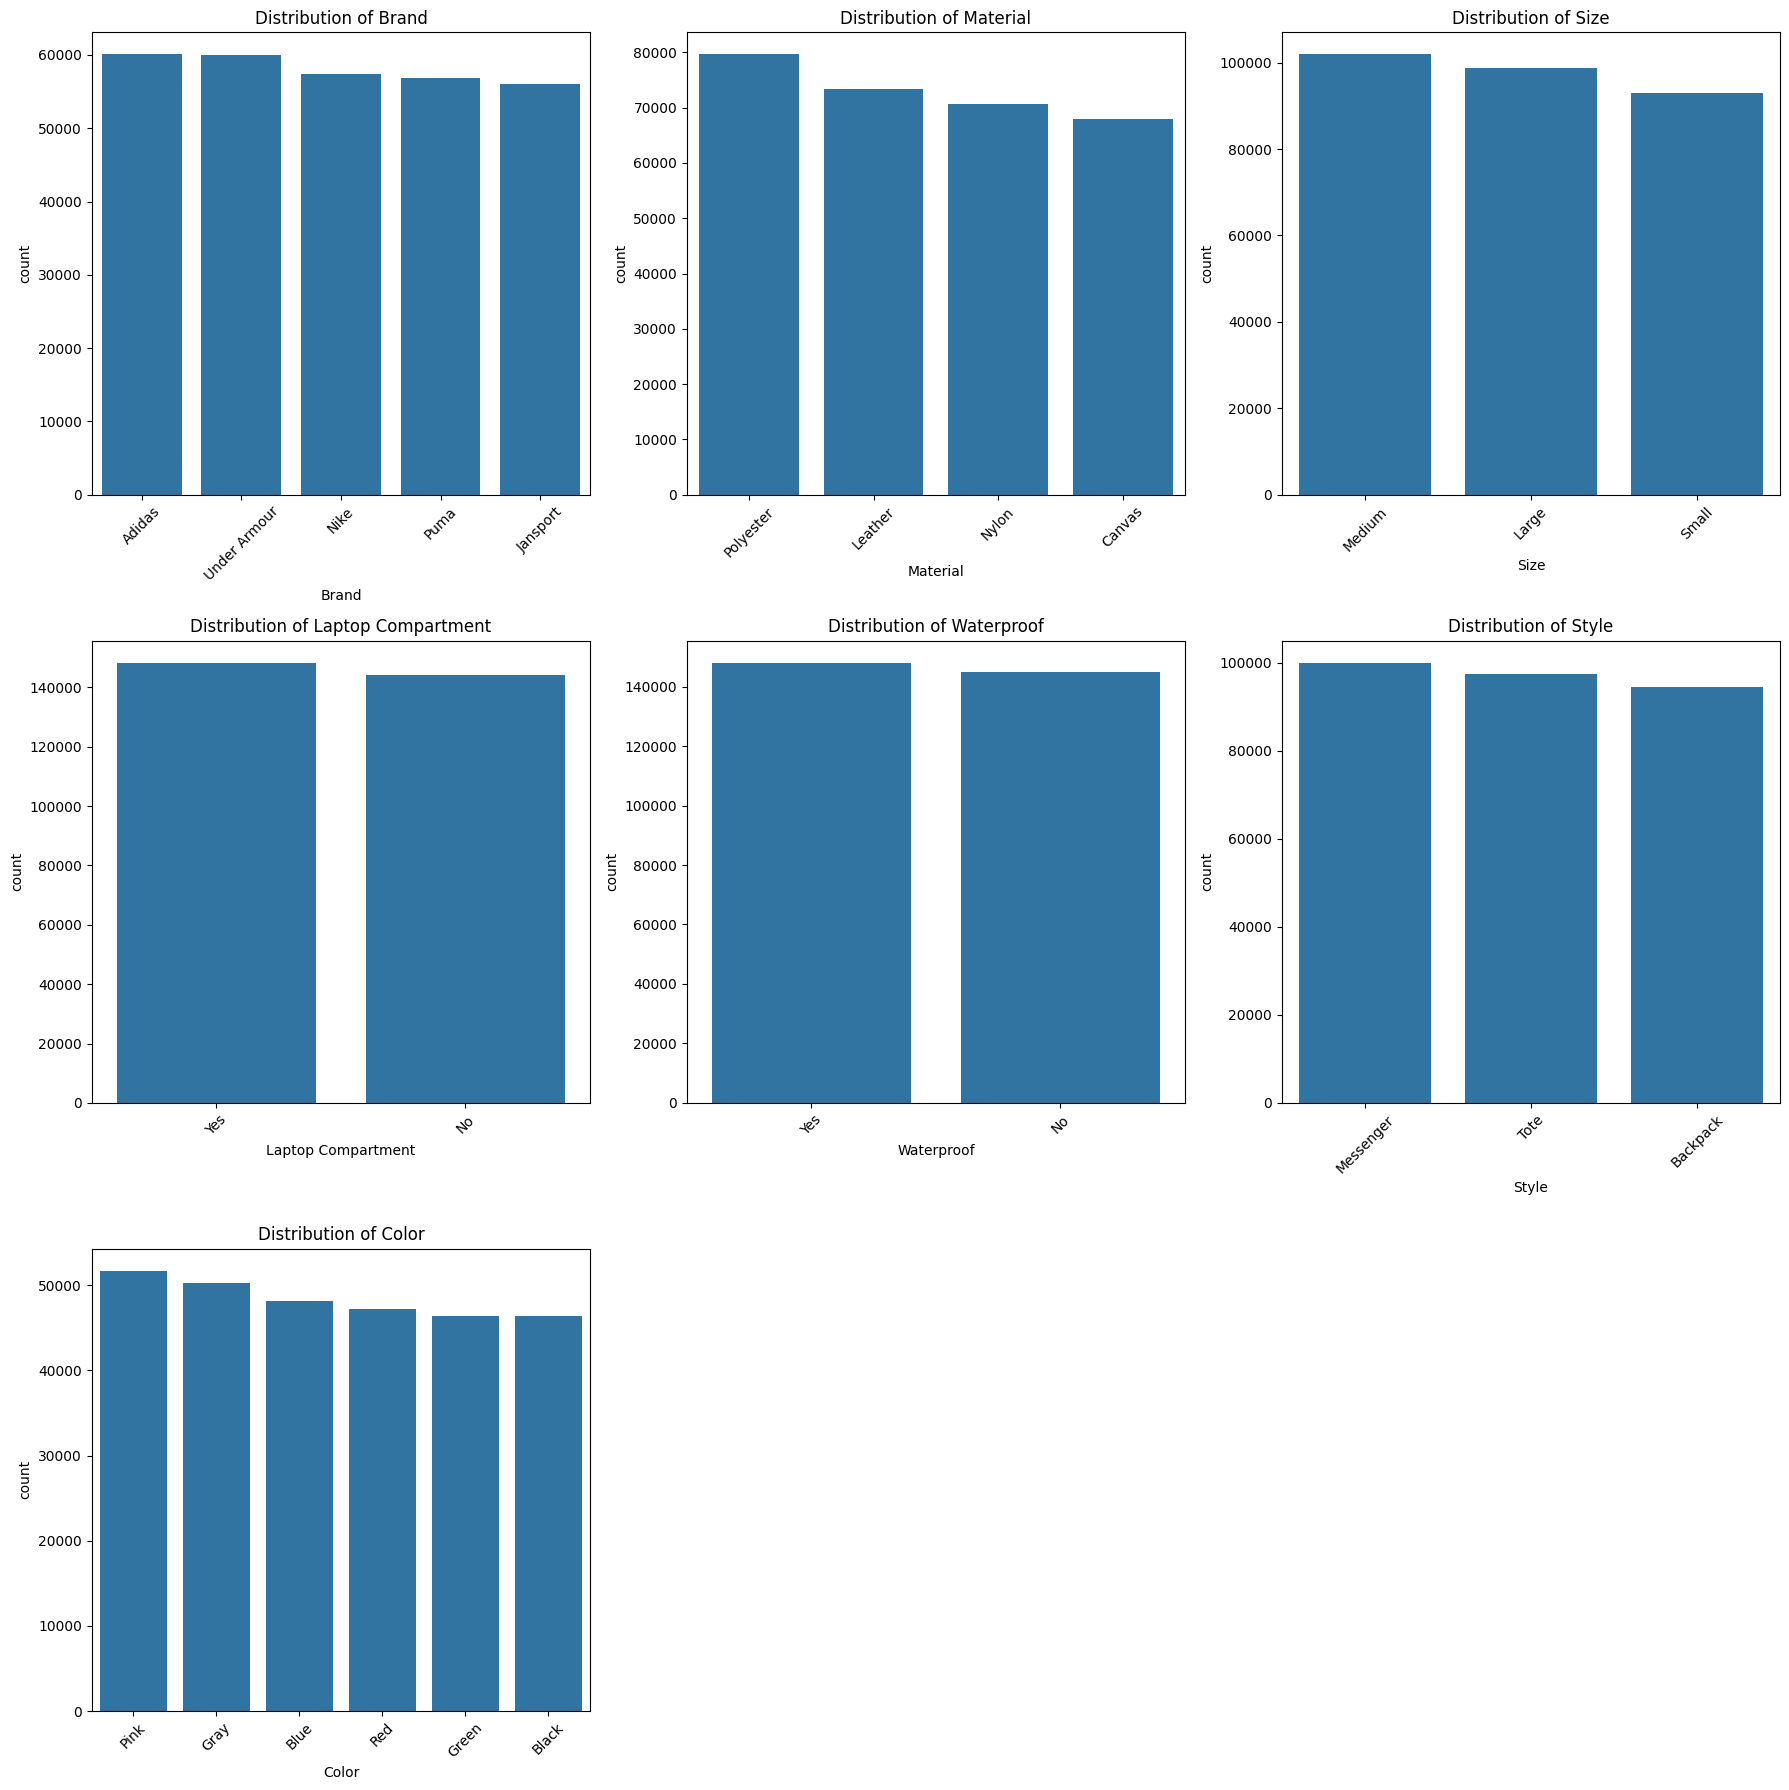

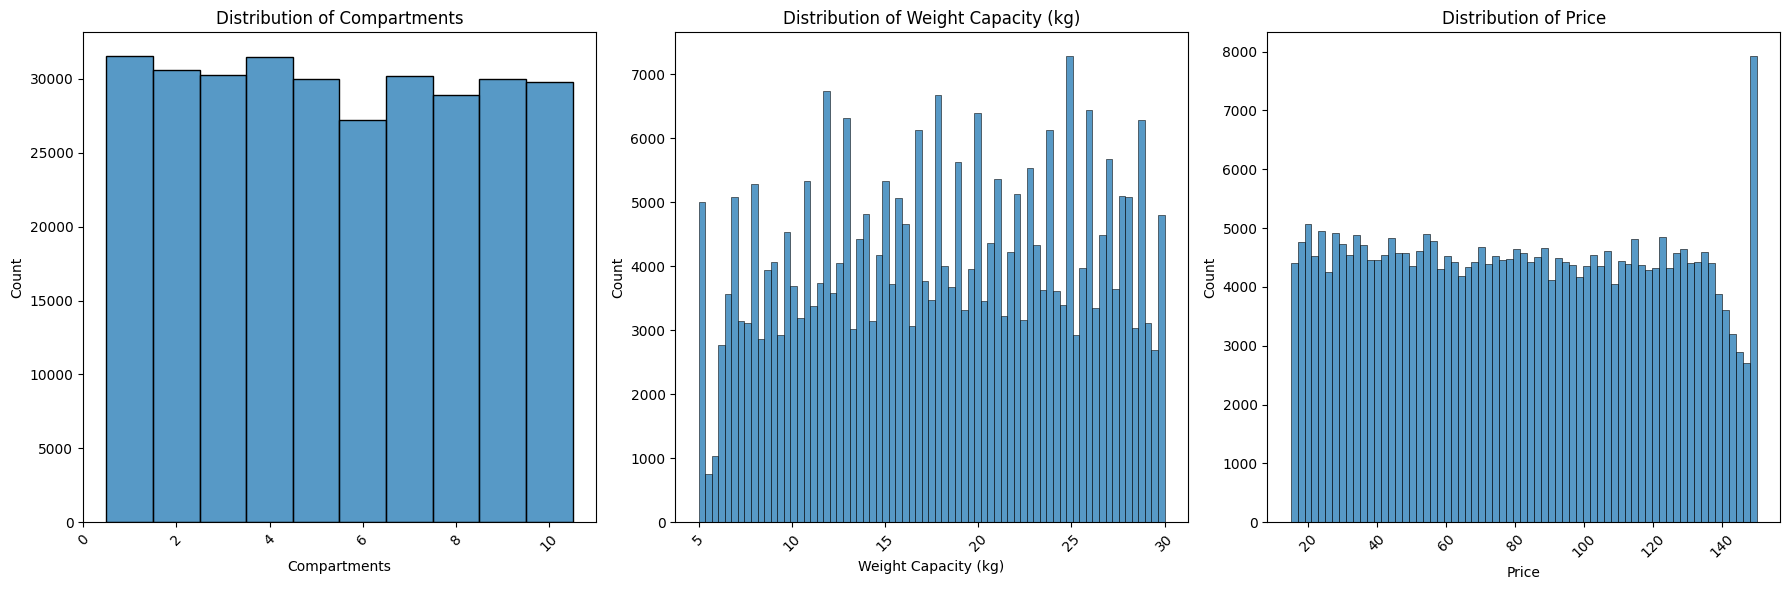

,count,mean,std,min,25%,50%,75%,max
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']

FIGURE_WIDTH = 18
PLOTS_PER_ROW = 3

def plot_categorical_columns(df):
    num_columns = len(categorical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_columns(df):
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.histplot(df[column], ax=axes[i], discrete=column == 'Compartments')
        axes[i].set_title(f"Distribution of {column}")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_columns(data)
plot_numeric_columns(data)

data.drop('id', axis=1).describe().T

### 🔗 Data Correlation

The correlation analysis revealed that no strong linear relationships appear to exist between the columns that could influence the target variable and, consequently, the model training.

As it can be seen both from the Categorical vs. Categorical countplots, there are no major correlations between different categorical features of the dataset. A similar conclusion can be taken from the correlation heatmap of the numeric columns.

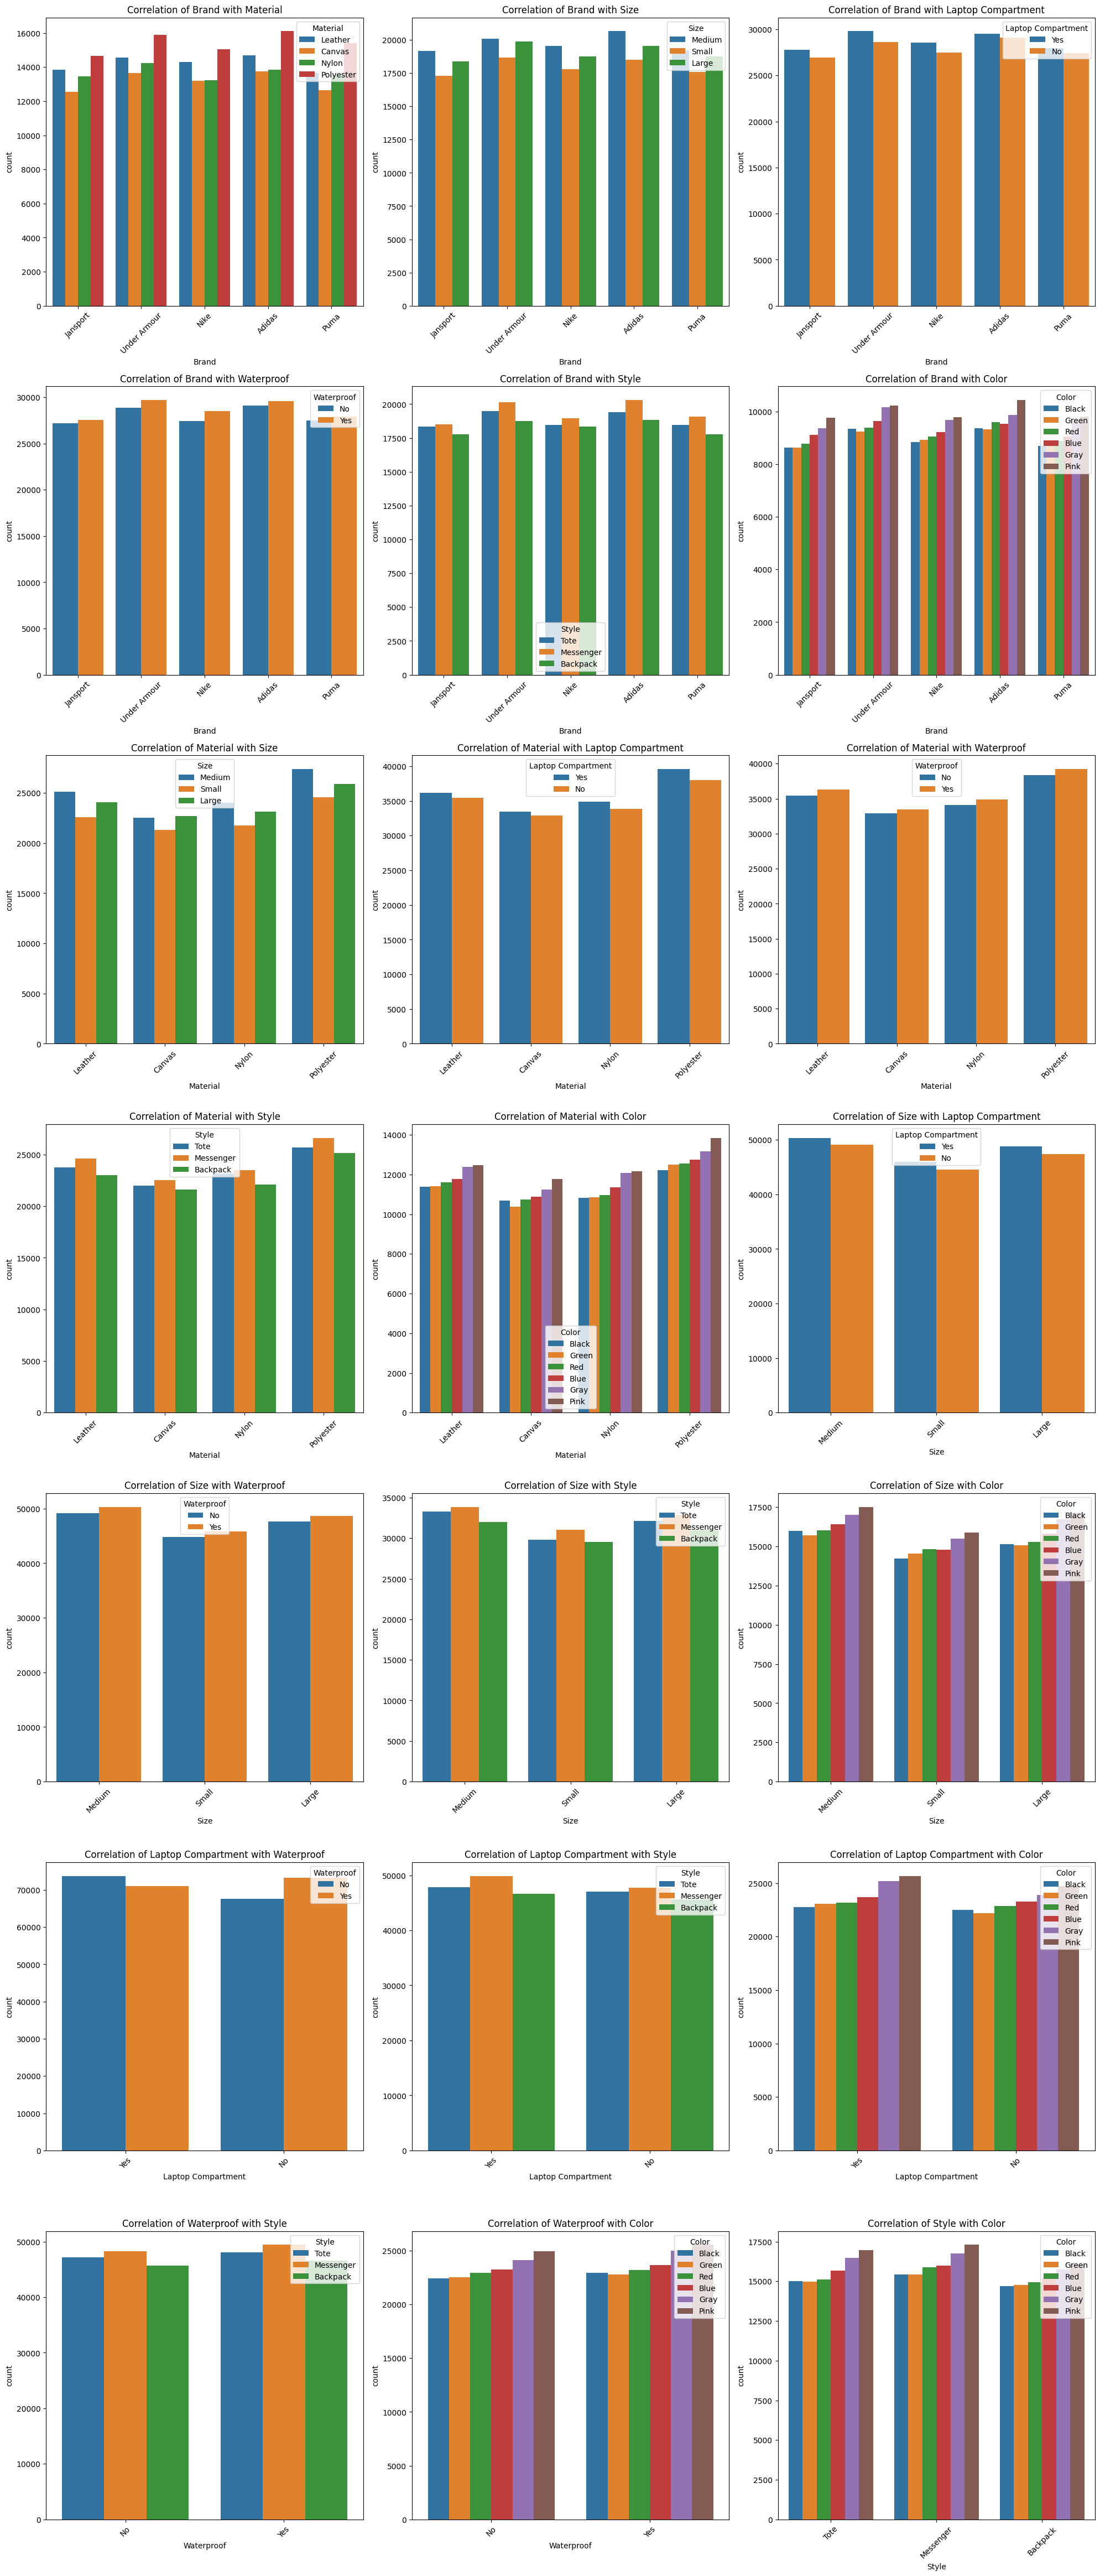

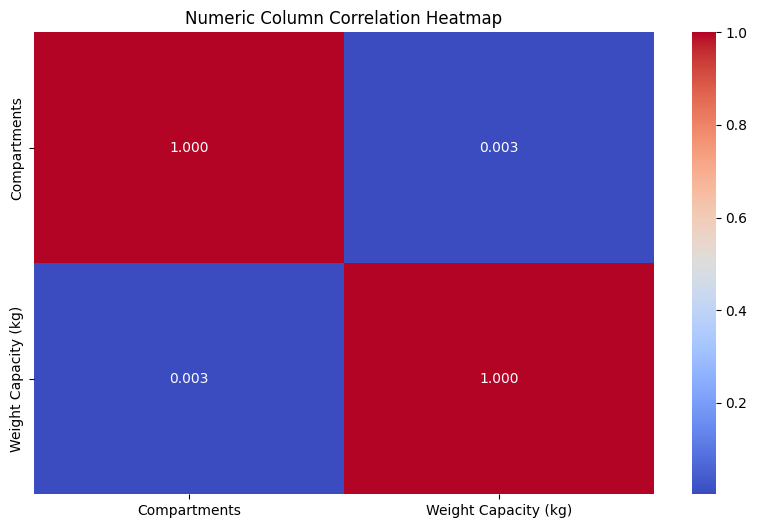

In [12]:
FIGURE_WIDTH = 20
PLOTS_PER_ROW = 3

def plot_categorical_corr(df):
    num_columns = (len(categorical_columns) * (len(categorical_columns) - 1)) // 2
    num_rows = math.ceil(num_columns / PLOTS_PER_ROW)

    fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW, figsize=(FIGURE_WIDTH, FIGURE_WIDTH / PLOTS_PER_ROW * num_rows))
    axes = axes.flatten()

    plot_idx = 0
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            sns.countplot(x=categorical_columns[i], hue=categorical_columns[j], data=data, ax=axes[plot_idx])
            axes[plot_idx].set_title(f"Correlation of {categorical_columns[i]} with {categorical_columns[j]}")
            axes[plot_idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
            plot_idx += 1

    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_numeric_corr(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[[col for col in numerical_columns if col != 'Price']].corr(), annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
    plt.title(f"Numeric Column Correlation Heatmap")
    plt.show()

plot_categorical_corr(data)
plot_numeric_corr(data)

---

## 🧹 Data Preprocessing

### 🧩 Data Imputation

As seen in the previous section, the training datasets contains missing values in most of the columns. To deal with this, data imputation is applied using the following methods:

- For **categorical features**: we will use the mode of the values because it preserves the most common category without introducing new values.
- For **numeric features**: we will use the median of the values because it is a reliable (better than using the mean) measure of the central tendency, reducing the influence of possible outliers or anomalies.

In [27]:
def impute_data(df):
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
    for col in numerical_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

impute_data(data)

### 🏷️ Data Encoding

To facilitate the modelling step, categorical features must also be encoded into numeric features that the machine learning algorithms can use. For the data encoding we used the following methods:

- **Label Encoding**: for columns Brand, Color, Material and Style, we assign codes to each of the original categories (since there is no implicit ordering)
- **Ordinal Mapping**: for the Size feature, we manually map the existing categories into numbers, preserving the natural size ordering
- **Binary Mapping**: for Laptop Compartment and Waterproof, we map the boolean values into integers (1 for Yes and 0 for No)

All of the new columns have slightly different names to be distinguishable from the existing ones.

In [14]:
def encode_data(df):
    global new_columns
    new_columns = []

    cat_columns_to_encode = [col for col in categorical_columns if col not in ['Laptop Compartment', 'Waterproof']]

    for col in cat_columns_to_encode:
        encoded_col = pd.get_dummies(df[col], prefix=col).astype(int)
        for new_col in encoded_col.columns:
            df[new_col] = encoded_col[new_col]
        new_columns.extend(encoded_col.columns)

    df['Has_Laptop_Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Is_Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})

    new_columns.extend(['Has_Laptop_Compartment', 'Is_Waterproof'])

encode_data(data)

### ⚖️ Data Normalization

A final step of the data preprocessing is the normalization of the numerical features to ensure that these columns have a comparable scale. In our dataset, this is the case for the Weight Capacity, whose feature can now be seen in the `Weight_Capacity_Ratio`. This ratio was obtained by dividing all values by the maximum value, creating a range of [0,1].

This reduces the risk of values of larger magnitude disproportionately influencing the models, while preserving the distribution and relative values of the data. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    global new_columns

    scaler = MinMaxScaler()
    df['Compartments_Ratio'] = scaler.fit_transform(df[['Compartments']])
    df['Weight_Capacity_Ratio'] = scaler.fit_transform(df[['Weight Capacity (kg)']])

    new_columns += [col for col in ['Compartments_Ratio', 'Weight_Capacity_Ratio'] if col not in new_columns]

normalize_data(data)

### 🎯 Target Definition

To conclude the data preprocessing, we will also define final columns of the dataset that will be used to train the models, as well as the target variable (Price).

In [16]:
final_columns = new_columns

X = data[final_columns]
y = data['Price']

print(X.head())
print(y.head())
print(X.shape)

   Brand_Adidas  Brand_Jansport  Brand_Nike  Brand_Puma  Brand_Under Armour  \
0             0               1           0           0                   0   
1             0               1           0           0                   0   
2             0               0           0           0                   1   
3             0               0           1           0                   0   
4             1               0           0           0                   0   

   Material_Canvas  Material_Leather  Material_Nylon  Material_Polyester  \
0                0                 1               0                   0   
1                1                 0               0                   0   
2                0                 1               0                   0   
3                0                 0               1                   0   
4                1                 0               0                   0   

   Size_Large  ...  Color_Black  Color_Blue  Color_Gray  Color_Green

___

## 🛠️ Model Building

### 🎛️ Parameter Tuning

Before moving on to the models themselves, it's important to set up the function that will determine the best parameters for a specific model for the given problem. 

For this we used **Grid Search with K-Fold Cross Validation** to find the parameters that reduce the prediction error.  
Based on the original challenge, we also used the **negative mean squared error** as the **scoring metric**.

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold

def tune_params(model, param_grid, X, y, cv=5):
    cv = KFold(n_splits=cv, shuffle=True, random_state=1)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=2, n_jobs=2)
    grid_search.fit(X, y)

    print(f"Best parameters:")
    for param_name, param_value in grid_search.best_params_.items():
        print(f"  {param_name}: {param_value}")

    return grid_search.best_params_

### 📑 Model Evaluation

In order to evaluate the performance of the models, K-Fold Cross Validation will also be used. For each train-test fold, the following metrics are used for analysis:

- **Mean Squared Error**: average square difference between predicted and actual value
- **Root Mean Squared Error**: more interpretable scale of previous metric
- **Mean Absolute Error**: average of the absolute difference between predicted and actual value
- **R² Score**: proportion of variance in the target variable explained by the model (remaining is noise or unexplained variance)

Additionally, the total **training time** and **testing time** are also measured and used for comparison.

In [18]:
import time

results = []
models = {}

def evaluate_regressor(model, X, y, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=1)

    mse_scores = []
    mae_scores = []
    r2_scores = []
    training_times = []
    testing_times = []

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        training_times.append(end_train - start_train)

        start_test = time.time()
        y_pred = model.predict(X_test)
        end_test = time.time()
        testing_times.append(end_test - start_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

        print(f"Trained model in {training_times[-1]:.4f} seconds and tested in {testing_times[-1]:.4f} seconds.")
    
    return {
        'MSE': np.mean(mse_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'MAE': np.mean(mae_scores),
        'R²': np.mean(r2_scores),
        'Train Time': np.mean(training_times),
        'Test Time': np.mean(testing_times)
    }

def print_results(results):
    print(f"Avg Mean Squared Error (MSE): {results['MSE']:.4f}")
    print(f"Avg Root Mean Squared Error (RMSE): {results['RMSE']:.4f}")
    print(f"Avg Mean Absolute Error (MAE): {results['MAE']:.4f}")
    print(f"Avg R² Score: {results['R²']:.4f}")
    print(f"Avg Training Time: {results['Train Time']:.4f} seconds")
    print(f"Avg Testing Time: {results['Test Time']:.4f} seconds")

def tune_and_eval(model, param_grid, X, y):
    print(f"Tuning parameters for {model.__class__.__name__}...")
    best_params = tune_params(model, param_grid, X, y)
    model.set_params(**best_params)

    print()
    print(f"Evaluating {model.__class__.__name__} with best parameters...")
    res = evaluate_regressor(model, X, y)
    print_results(res)
    return res

### 🌲 Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [1, 2, 3, 4, 5, None],
    'max_features': [1, 2, 5, 10, None],
}

X_sample = X.sample(30000, random_state=1)
y_sample = y.loc[X_sample.index]

result = tune_and_eval(model, param_grid, X_sample, y_sample)
models['Decision Tree'] = model
result['Model'] = 'Decision Tree'
results.append(result)

Tuning parameters for DecisionTreeRegressor...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END criterion=squared_error, max_depth=1, max_features=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=5; total ti

[Text(0.5, 0.875, 'Weight_Capacity_Ratio <= 0.199\nsquared_error = 1524.065\nsamples = 300000\nvalue = 81.411'),
 Text(0.25, 0.625, 'Weight_Capacity_Ratio <= 0.042\nsquared_error = 1507.126\nsamples = 48968\nvalue = 79.311'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Weight_Capacity_Ratio <= 0.005\nsquared_error = 1527.969\nsamples = 6648\nvalue = 76.691'),
 Text(0.0625, 0.125, 'squared_error = 1543.177\nsamples = 4556\nvalue = 78.322'),
 Text(0.1875, 0.125, 'squared_error = 1476.419\nsamples = 2092\nvalue = 73.137'),
 Text(0.375, 0.375, 'Brand_Adidas <= 0.5\nsquared_error = 1502.604\nsamples = 42320\nvalue = 79.722'),
 Text(0.3125, 0.125, 'squared_error = 1508.325\nsamples = 32497\nvalue = 80.119'),
 Text(0.4375, 0.125, 'squared_error = 1481.435\nsamples = 9823\nvalue = 78.41'),
 Text(0.75, 0.625, 'Material_Leather <= 0.5\nsquared_error = 1526.341\nsamples = 251032\nvalue = 81.821'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Material_Nylon <= 0.5\nsquared_error = 15

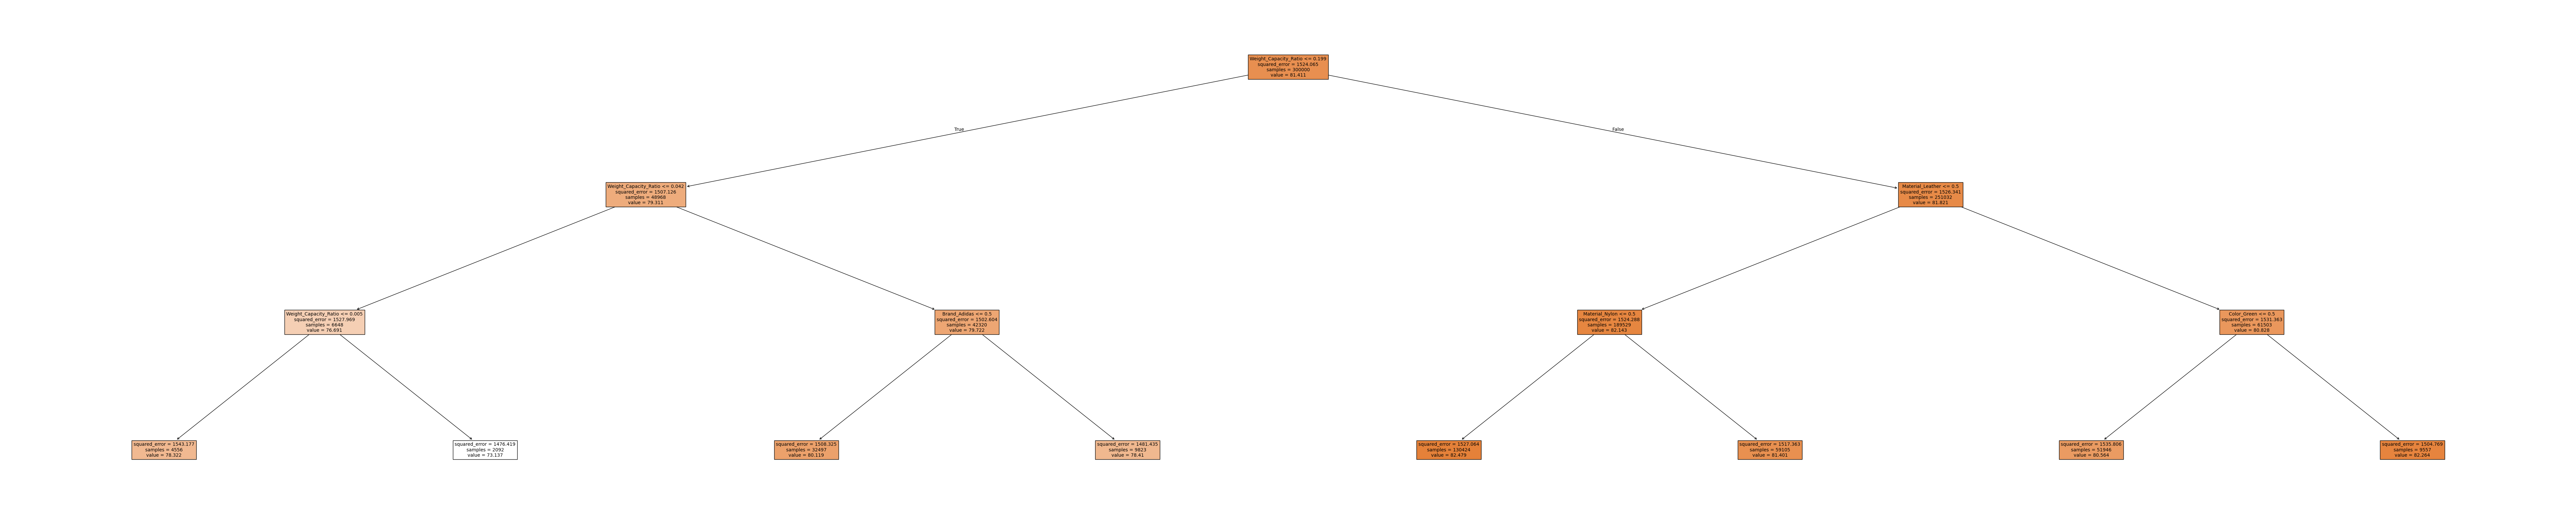

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(random_state=1, criterion='squared_error', max_depth=3)
model.fit(X, y)

plt.figure(figsize=(100, 20))

plot_tree(model, filled=True, feature_names=X.columns, fontsize=10, max_depth=5)

### 🏘️ K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [2, 5, 10, 50, 100],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 -> manhattan; 2 -> euclidean
}

result = tune_and_eval(model, param_grid, X_sample, y_sample)
# result = tune_and_eval(model, param_grid, X, y)
models['K Nearest Neighbors'] = model
result['Model'] = 'K Nearest Neighbors'
results.append(result)

Tuning parameters for KNeighborsRegressor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.8s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.7s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.8s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.2s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.9s
[C

### ➡️ Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR

model = SVR();
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}

result = tune_and_eval(model, param_grid, X_sample, y_sample)
# result = tune_and_eval(model, param_grid, X, y)
models['Support Vector Machines'] = model
result['Model'] = 'Support Vector Machines'
results.append(result)

### 🧠 Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, max_iter=1000) # Tune max_iter
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['adaptive'],
}

result = tune_and_eval(model, param_grid, X_sample, y_sample)
#result = tune_and_eval(model, param_grid, X, y)
models['Neural Network'] = model
result['Model'] = 'Neural Network'
results.append(result)

### 🎲 Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)


param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['squared_error'],
    'max_depth': [1, 3, 5, None],
    'max_features': [10, None],
}

result = tune_and_eval(model, param_grid, X_sample, y_sample)
#result = tune_and_eval(model, param_grid, X, y)
models['Random Forest'] = model
result['Model'] = 'Random Forest'
results.append(result)

___

## 📊 Result Analysis

In [22]:
results = pd.DataFrame(results)
results.set_index('Model', inplace=True)

print(results)

                             MSE       RMSE        MAE        R²  Train Time  \
Model                                                                          
Decision Tree        1527.970403  39.089262  33.832124 -0.000041    0.013972   
K Nearest Neighbors  1543.381150  39.285890  33.966487 -0.010108    0.005871   

                     Test Time  
Model                           
Decision Tree         0.001729  
K Nearest Neighbors   0.358088  


### 🤼🏼‍♂️ Metric Comparison

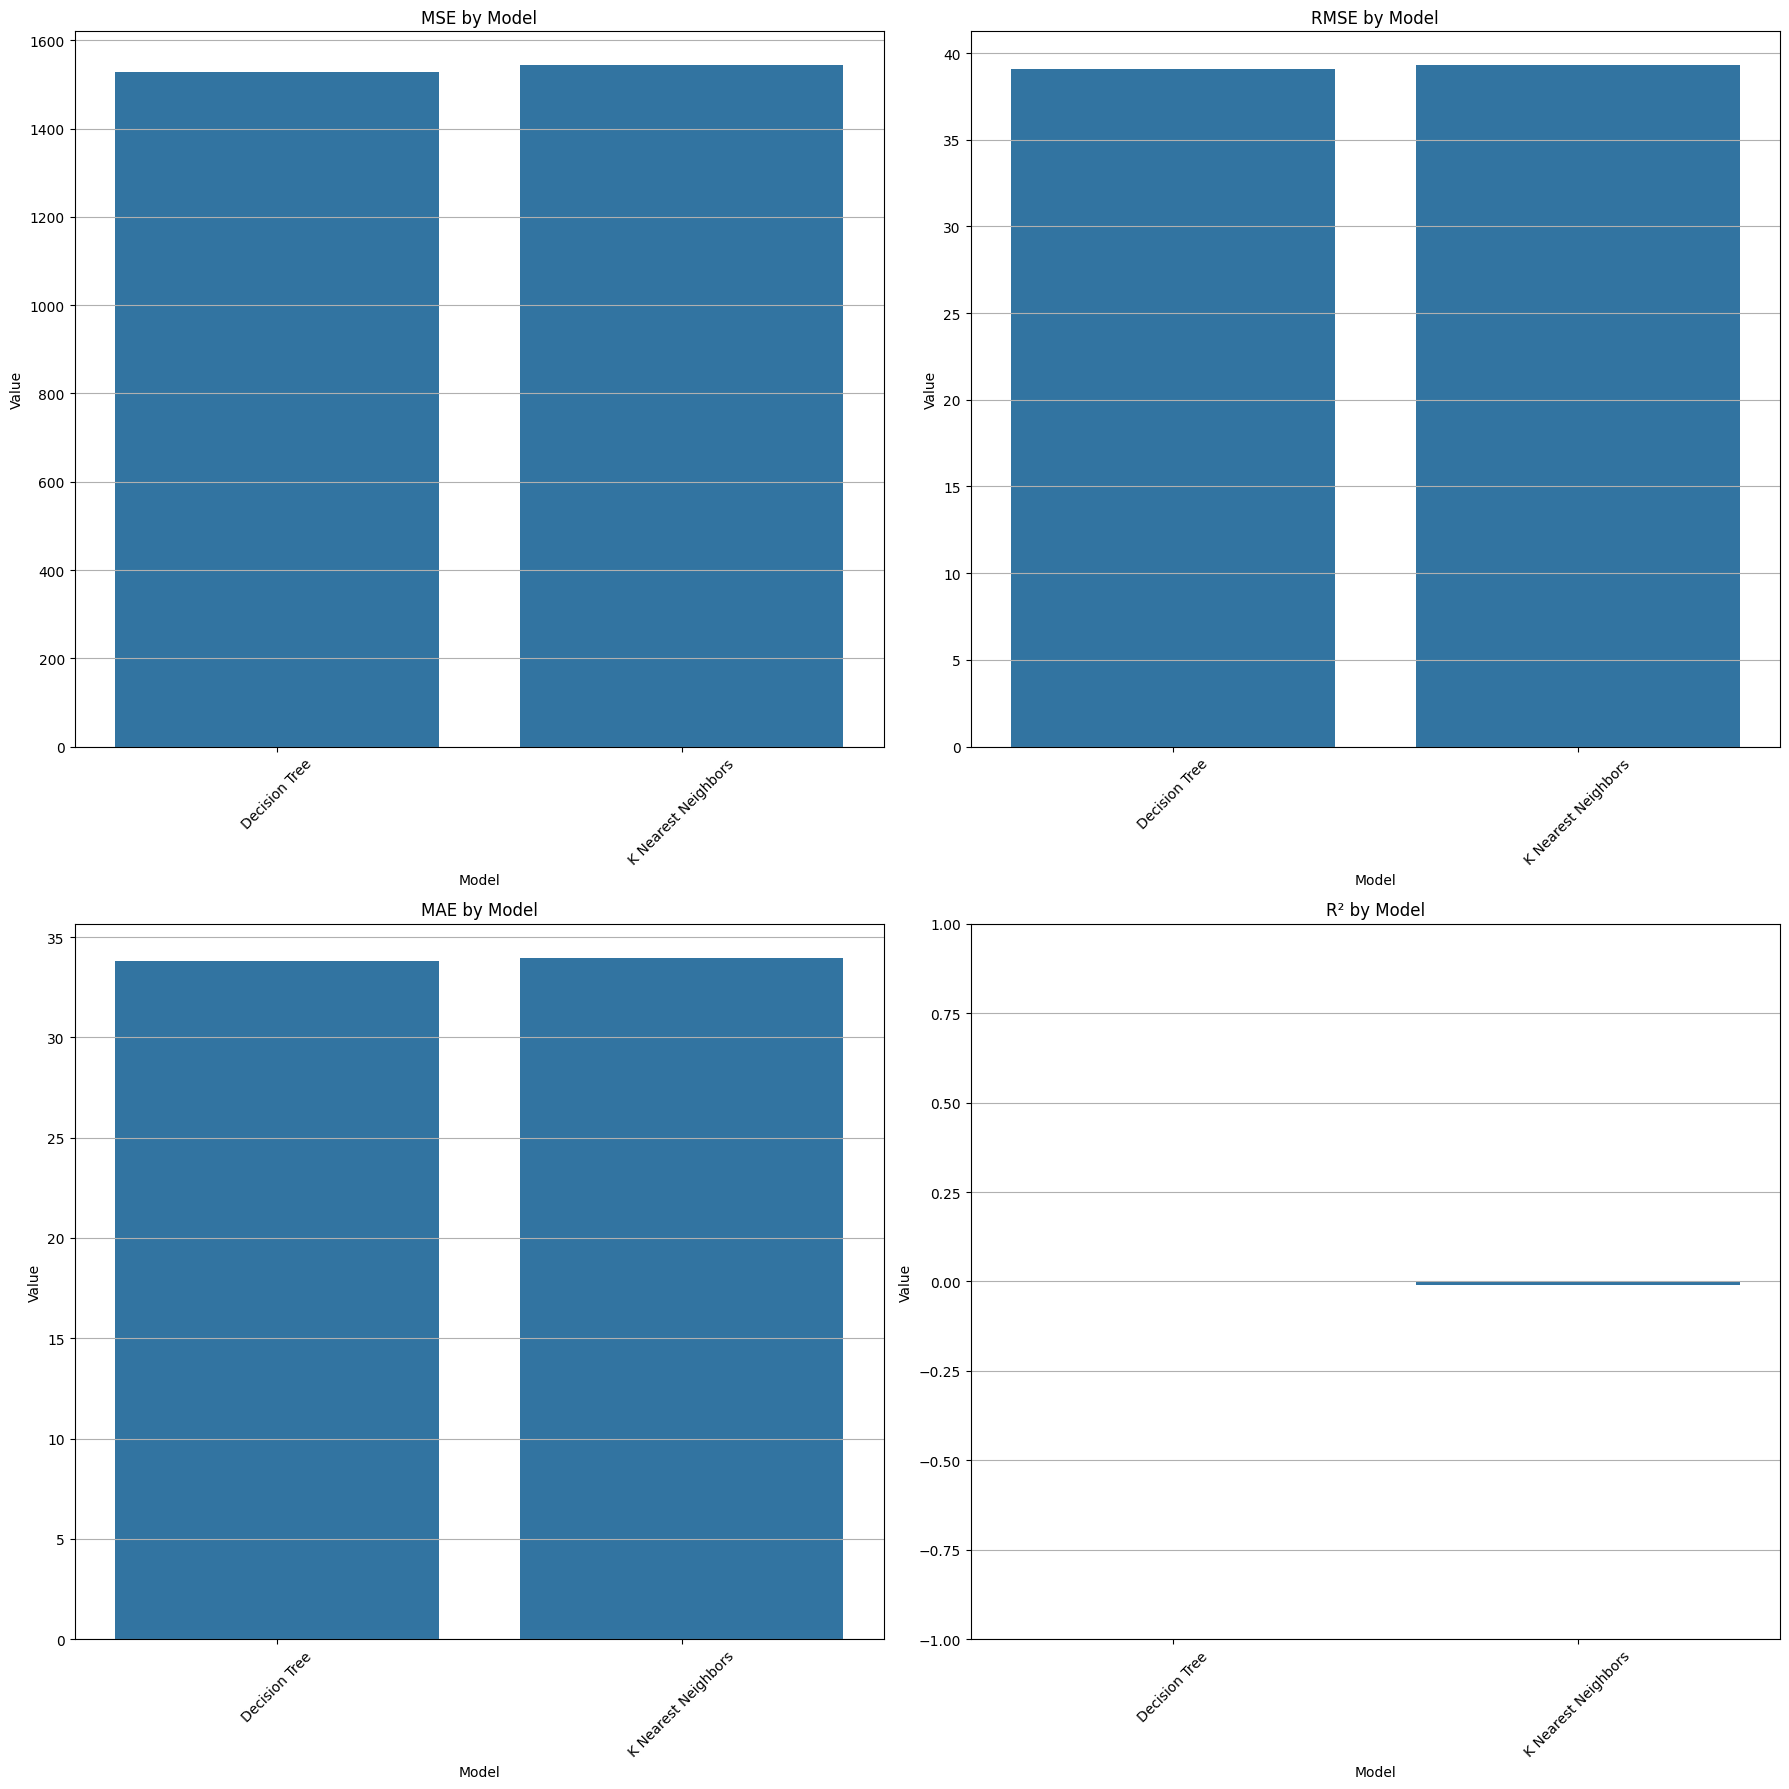

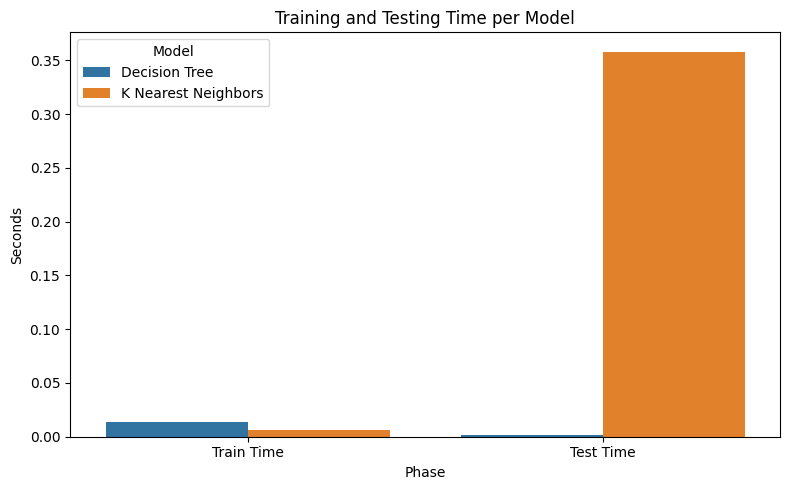

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Melt your DataFrame
plot_df = results.reset_index()
metrics_to_plot = ['MSE', 'RMSE', 'MAE', 'R²']
melted = plot_df.melt(id_vars='Model', value_vars=metrics_to_plot,
                      var_name='Metric', value_name='Value')

# Constants
FIGURE_WIDTH = 18
PLOTS_PER_ROW = 2
num_metrics = len(metrics_to_plot)
num_rows = math.ceil(num_metrics / PLOTS_PER_ROW)

# Subplots
fig, axes = plt.subplots(num_rows, PLOTS_PER_ROW,
                         figsize=(FIGURE_WIDTH, (FIGURE_WIDTH / PLOTS_PER_ROW) * num_rows))
axes = axes.flatten()

# One subplot per metric
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(data=melted[melted['Metric'] == metric],
                x='Model', y='Value', ax=axes[i])
    axes[i].set_title(f'{metric} by Model')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

    # Set y-axis for R² specifically
    if metric == 'R²':
        axes[i].set_ylim(-1, 1)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



timing = plot_df.melt(id_vars='Model', value_vars=['Train Time', 'Test Time'],
                      var_name='Phase', value_name='Time (s)')

plt.figure(figsize=(8, 5))
sns.barplot(data=timing, x='Phase', y='Time (s)', hue='Model')
plt.title("Training and Testing Time per Model")
plt.ylabel("Seconds")
plt.tight_layout()
plt.show()

### 〰️ Learning Curve

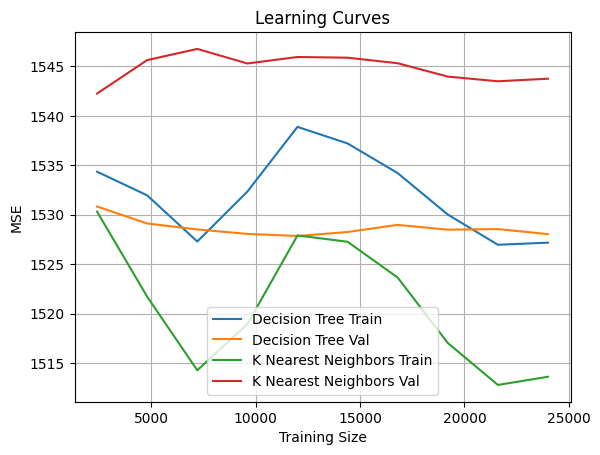

In [24]:
from sklearn.model_selection import learning_curve

for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_sample, y_sample, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    plt.plot(train_sizes, -train_scores.mean(axis=1), label=f"{name} Train")
    plt.plot(train_sizes, -val_scores.mean(axis=1), label=f"{name} Val")

plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

___

## 🔮 Predictions

In [28]:
import pandas as pd

def select_and_run_best_model(models, results, X_test, test_data):
    best_model_name = results['RMSE'].idxmin()
    best_model = models[best_model_name]

    print(f"Best model: {best_model_name}")

    y_pred = best_model.predict(X_test)
    print(f"Predictions: {y_pred[:5]}")

    test_data['Price'] = y_pred
    
    return test_data

test_data = pd.read_csv(dataset_test)
test_data.info()

impute_data(test_data)
encode_data(test_data)
normalize_data(test_data)

X_test = test_data[final_columns]

predicted_data = select_and_run_best_model(models, results, X_test, test_data)

print(predicted_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB
Best model: Decision Tree
Predictions: [82.00636915 82.00636915 82.00636915 82.00636915 78.72327355]
       id   Brand Material    Size  Compartments Laptop Compartment  \
0  300000    Puma  Leather   S

In [29]:
submission_file = "submission.csv"
predicted_data[['id', 'Price']].to_csv(submission_file, index=False)
print(f"Submission file created: {submission_file}")

Submission file created: submission.csv
